# Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from kmodes.kprototypes import KPrototypes
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.base import BaseEstimator, TransformerMixin

# Import Data

In [2]:
df = pd.read_csv('data/clean_data_preprocessing.csv')
df_cluster = pd.read_csv('data/clean_data.csv')
df.head()

,Age,Job,Saving accounts,Credit amount,Duration,Purpose,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Checking account_little,Checking account_moderate,Checking account_rich,Checking account_unknown
0,67,2,4,-0.745131,6,5,0,1,0,1,0,1,0,0,0
1,22,2,0,0.949817,48,5,1,0,0,1,0,0,1,0,0
2,49,1,0,-0.416562,12,3,0,1,0,1,0,0,0,0,1
3,45,2,0,1.634247,42,4,0,1,1,0,0,1,0,0,0
4,53,2,0,0.566664,24,1,0,1,1,0,0,1,0,0,0


# Data Preparation

In [3]:
numerik = df_cluster.select_dtypes(exclude=['object']).columns
kategorik = df_cluster.select_dtypes(include=['object']).columns

print('Kolom pada Dataset', '\n', df.columns, '\n')
print('Kolom kategorik', '\n', kategorik, '\n')
print('Kolom numerik', '\n', numerik)

Kolom pada Dataset 
 Index(['Age', 'Job', 'Saving accounts', 'Credit amount', 'Duration', 'Purpose',
       'Sex_female', 'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Checking account_unknown'],
      dtype='object') 

Kolom kategorik 
 Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object') 

Kolom numerik 
 Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


In [4]:
split_kategorik = '|'.join(kategorik)
kolom_kategorik = split_kategorik
kolom = df.columns
kolom_kategorik

'Sex|Housing|Saving accounts|Checking account|Purpose'

In [5]:
indeks_kategorik = [i for i, nama_kolom in enumerate(kolom) if re.search(kolom_kategorik, nama_kolom)]
indeks_kategorik

[2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Mencari Index Kolom Kategorik menggunakan Regular Expression<br>
Kolom kategorik berada pada index **[2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]**

# Modeling

Berdasarkan hasil dari file **code_preprocessing**, didapatkan jumlah Klaster pada setiap Algoritma sebagai berikut:
- **Algoritma** **KPrototypes** menggunakan Klaster sebanyak 3
- **Algoritma** **KMeans** menggunakan Klaster sebanyak 3
- **Algoritma** **AgglomerativeClustering** menggunakan Klaster sebanyak 3

In [6]:
hasil = pd.DataFrame(columns=['Algoritma', 'Silhoutte Score', 'CH Index Score'])

Membuat Dataframe baru untuk menampung Hasil Evaluasi setiap Algoritma

### **Algoritma KMeans**

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=50)
member = kmeans.fit_predict(df, y=None)

silhouette_avg = silhouette_score(df, member)
ch_score = calinski_harabasz_score(df, member)

hasil = hasil.append({'Algoritma': 'KMeans', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)
hasil

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_5460/60562826.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'Algoritma': 'KMeans', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)


,Algoritma,Silhoutte Score,CH Index Score
0,KMeans,0.420247,805.542713


In [8]:
df_kmeans = df_cluster.copy()
df_kmeans['Cluster'] = kmeans.labels_
df_kmeans['Cluster'] = df_kmeans['Cluster'].astype('category')

print(df_kmeans['Cluster'].value_counts())
df_kmeans.head()

1    566
2    234
0    200
Name: Cluster, dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,unknown,little,1169,6,radio/TV,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,unknown,2096,12,education,2
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,2


### **Algoritma KPrototypes**

In [9]:
kprototypes = KPrototypes(n_clusters=3, random_state=42, n_init=50)
member = kprototypes.fit_predict(df, y=None, categorical=indeks_kategorik)

silhouette_avg = silhouette_score(df, member)
ch_score = calinski_harabasz_score(df, member)

hasil = hasil.append({'Algoritma': 'KPrototypes', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)
hasil

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_5460/2161754663.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'Algoritma': 'KPrototypes', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)


,Algoritma,Silhoutte Score,CH Index Score
0,KMeans,0.420247,805.542713
1,KPrototypes,0.420118,805.535396


In [10]:
df_kprototypes = df_cluster.copy()
df_kprototypes['Cluster'] = kprototypes.labels_
df_kprototypes['Cluster'] = df_kprototypes['Cluster'].astype('category')

print(df_kprototypes['Cluster'].value_counts())
df_kprototypes.head()

1    565
0    234
2    201
Name: Cluster, dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,unknown,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,unknown,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,2
4,53,male,2,free,little,little,4870,24,car,0


### **Algoritma Agglomerative Clustering**

In [11]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
member = agglomerative.fit_predict(df, y=None)

silhouette_avg = silhouette_score(df, member)
ch_score = calinski_harabasz_score(df, member)

hasil = hasil.append({'Algoritma': 'AgglomerativeClustering', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)
hasil

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_5460/3934673411.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'Algoritma': 'AgglomerativeClustering', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)


,Algoritma,Silhoutte Score,CH Index Score
0,KMeans,0.420247,805.542713
1,KPrototypes,0.420118,805.535396
2,AgglomerativeClustering,0.358904,704.088983


In [12]:
df_agglomerative = df_cluster.copy()
df_agglomerative['Cluster'] = agglomerative.labels_
df_agglomerative['Cluster'] = df_agglomerative['Cluster'].astype('category')

print(df_agglomerative['Cluster'].value_counts())
df_agglomerative.head()

2    476
0    334
1    190
Name: Cluster, dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,unknown,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,unknown,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


# Hasil Clustering

In [13]:
hasil.loc[hasil[['Silhoutte Score', 'CH Index Score']].idxmax()].iloc[[0]]

,Algoritma,Silhoutte Score,CH Index Score
0,KMeans,0.420247,805.542713


Menggunakan **Algoritma KMeans** karena menghasilkan<br>
Nilai Silhoutte Score dan CH Index Score paling tinggi

In [14]:
df_cluster['Cluster'] = kmeans.labels_
df_cluster['Cluster'] = df_cluster['Cluster'].astype('category')
df_cluster.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,unknown,little,1169,6,radio/TV,2
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,unknown,2096,12,education,2
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,2


Membuat Kolom Cluster untuk menampung **Hasil Clustering** berdasarkan Algoritma KMeans

### **Evaluasi**

In [15]:
numerik = df_cluster.select_dtypes(exclude=['object']).columns
kategorik = df_cluster.select_dtypes(include=['object']).columns.append(pd.Index(['Job']))

In [16]:
# Labels
age_labels = ['Remaja', 'Dewasa', 'Lansia']

# Code here
df_cluster['Age label'] = pd.qcut((df_cluster['Age']), 3, labels=age_labels)
cols = ['Age']

# Code here
groupby_age = df_cluster.groupby('Age label')[cols].mean()
groupby_age['Median'] = df_cluster.groupby('Age label')[cols].median()
groupby_age['Max'] = df_cluster.groupby('Age label')[cols].max()
groupby_age['Min'] = df_cluster.groupby('Age label')[cols].min()

groupby_age

,Age,Median,Max,Min
Age label,,,,
Remaja,24.766467,25.0,28,19
Dewasa,33.251445,33.0,38,29
Lansia,49.278125,47.0,75,39


Dari tabel diatas didapatkan :
- **Untuk kelompok Remaja**, rata-rata umur yaitu 25<br>
Remaja memiliki Nilai tengah 25, Nilai maksimal 28, Nilai Minimal 19

- **Untuk kelompok Dewasa** rata-rata umur yaitu 33<br>
Dewasa memiliki Nilai tengah 33, Nilai maksimal 38, Nilai Minimal 29

- **Untuk kelompok Lansia** rata-rata umur yaitu 49<br>
Lansia memiliki Nilai tengah 47, Nilai maksimal 75, Nilai Minimal 39

In [17]:
kategorik = kategorik.union(['Age label'])

cluster_numerik = df_cluster.groupby('Cluster')[numerik].mean().round(1)
cluster_kategorik = df_cluster.groupby('Cluster')[kategorik].agg(lambda x: x.mode().iloc[0])
cluster_size = df_cluster.groupby(['Cluster'], as_index=False).size()

hasil_cluster = pd.concat([cluster_numerik, cluster_kategorik, cluster_size], axis=1)
hasil_cluster

C:\Users\RAIHAN~1\AppData\Local\Temp/ipykernel_5460/4290870158.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_numerik = df_cluster.groupby('Cluster')[numerik].mean().round(1)


,Age,Job,Credit amount,Duration,Age label,Checking account,Housing,Job,Purpose,Saving accounts,Sex,Cluster,size
0,33.8,2.1,6369.4,40.5,Dewasa,moderate,own,2,car,little,male,0,200
1,29.6,1.9,2408.6,16.0,Dewasa,unknown,own,2,car,little,male,1,566
2,51.4,1.8,2709.9,16.2,Lansia,unknown,own,2,car,little,male,2,234


Mengelompokkan berdasarkan Cluster data dengan :
- Mengambil nilai rata-rata pada kolom Numerik
  - Age
  - Credit amount
  - Duration

- Mengambil nilai rata-rata pada kolom Numerik
  - Checking account
  - Housing
  - Job
  - Purpose
  - Saving accounts
  - Sex
  - Age label

Lalu menggabungkan kedua data tersebut dan Menambahkan jumlah data pada setiap cluster

In [18]:
# Menampilkan hasil
hasil = []
for kolom in kategorik:
    hasil = df_cluster.groupby('Cluster')[kolom].value_counts().unstack()
    print(hasil)
    for i in range(50): print('=', end='')
    print('\n\n')

Age label  Remaja  Dewasa  Lansia
Cluster                          
0              69      80      51
1             265     266      35
2               0       0     234


Checking account  little  moderate  rich  unknown
Cluster                                          
0                     58        68     6       68
1                    153       158    37      218
2                     63        43    20      108


Housing  free  own  rent
Cluster                 
0          38  136    26
1          30  409   127
2          40  168    26


Job       0    1    2   3
Cluster                  
0         2   18  133  47
1        13  118  370  65
2         7   64  127  36


Purpose  business  car  domestic appliances  education  furniture/equipment  \
Cluster                                                                       
0              33   64                    2         14                   27   
1              49  181                    8         29                  120   
2

**Jumlah setiap kategori pada seluruh Kolom kategorik**

#### **Cluster 0**
Persebaran kolom kategorik pada cluster ke-1

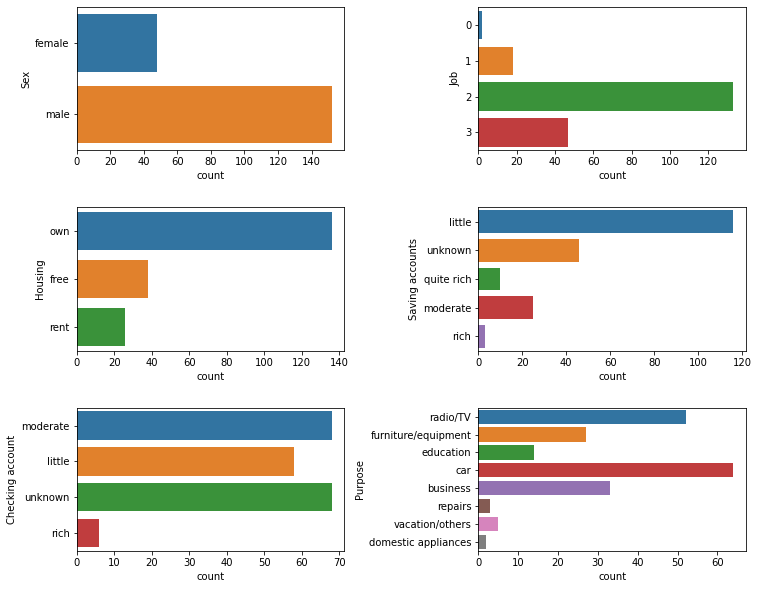

In [19]:
fig, ax = plt.subplots(3,2,figsize=(12,10))

sns.countplot(y = 'Sex', data = df_cluster[df_cluster['Cluster']==0], ax=ax[0][0])
sns.countplot(y = 'Job', data = df_cluster[df_cluster['Cluster']==0], ax=ax[0][1])
sns.countplot(y = 'Housing', data = df_cluster[df_cluster['Cluster']==0], ax=ax[1][0])
sns.countplot(y = 'Saving accounts', data = df_cluster[df_cluster['Cluster']==0], ax=ax[1][1])
sns.countplot(y = 'Checking account', data = df_cluster[df_cluster['Cluster']==0], ax=ax[2][0])
sns.countplot(y = 'Purpose', data = df_cluster[df_cluster['Cluster']==0], ax=ax[2][1])

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

In [20]:
min = df_cluster[df_cluster['Cluster'] == 0]['Age'].min()
max = df_cluster[df_cluster['Cluster'] == 0]['Age'].max()

print(f'Umur Minimal Customer {min}, Umur Maksimal Customer {max}')

Umur Minimal Customer 21, Umur Maksimal Customer 63


#### **Cluster 1**
Persebaran kolom kategorik pada cluster ke-2

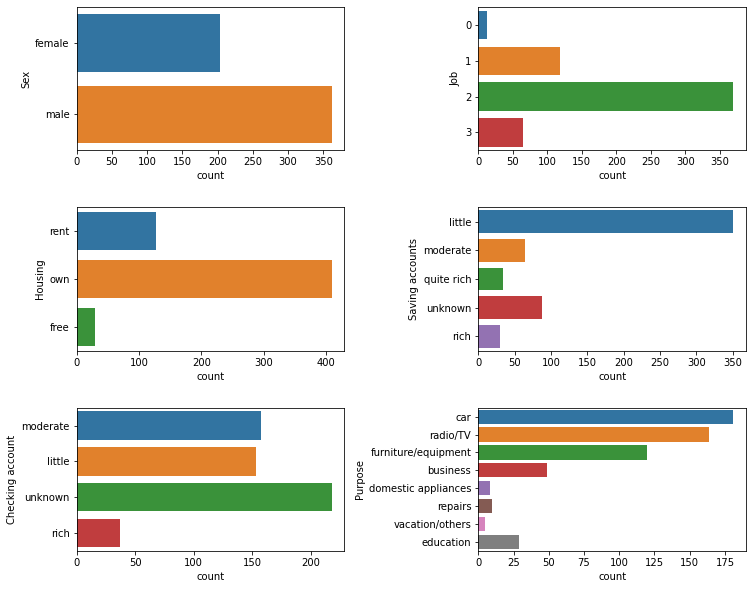

In [21]:
fig, ax = plt.subplots(3,2,figsize=(12,10))

sns.countplot(y = 'Sex', data = df_cluster[df_cluster['Cluster'] == 1], ax=ax[0][0])
sns.countplot(y = 'Job', data = df_cluster[df_cluster['Cluster'] == 1], ax=ax[0][1])
sns.countplot(y = 'Housing', data = df_cluster[df_cluster['Cluster'] == 1], ax=ax[1][0])
sns.countplot(y = 'Saving accounts', data = df_cluster[df_cluster['Cluster'] == 1], ax=ax[1][1])
sns.countplot(y = 'Checking account', data = df_cluster[df_cluster['Cluster'] == 1], ax=ax[2][0])
sns.countplot(y = 'Purpose', data = df_cluster[df_cluster['Cluster'] == 1], ax=ax[2][1])

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

In [22]:
min = df_cluster[df_cluster['Cluster'] == 1]['Age'].min()
max = df_cluster[df_cluster['Cluster'] == 1]['Age'].max()

print(f'Umur Minimal Customer {min}, Umur Maksimal Customer {max}')

Umur Minimal Customer 19, Umur Maksimal Customer 40


#### **Cluster 2**
Persebaran kolom kategorik pada cluster ke-3

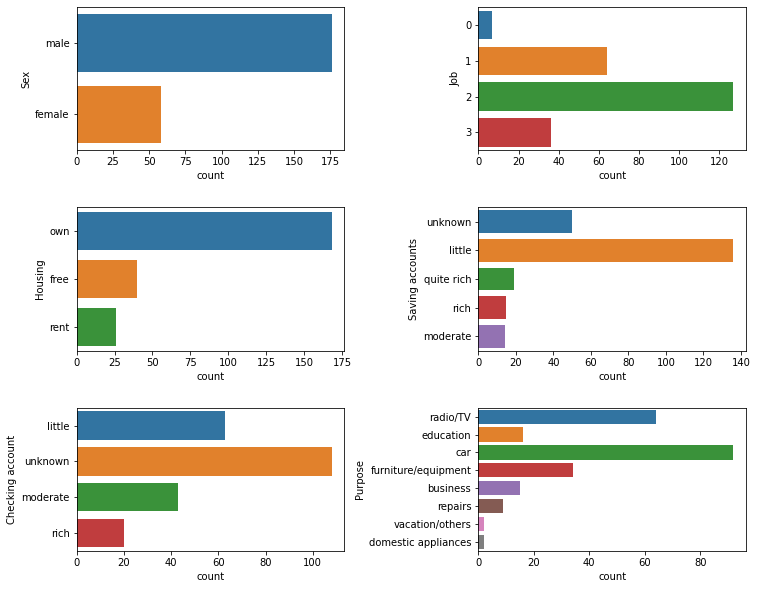

In [23]:
fig, ax = plt.subplots(3,2,figsize=(12,10))

sns.countplot(y = 'Sex', data = df_cluster[df_cluster['Cluster'] ==  2], ax=ax[0][0])
sns.countplot(y = 'Job', data = df_cluster[df_cluster['Cluster'] ==  2], ax=ax[0][1])
sns.countplot(y = 'Housing', data = df_cluster[df_cluster['Cluster'] ==  2], ax=ax[1][0])
sns.countplot(y = 'Saving accounts', data = df_cluster[df_cluster['Cluster'] ==  2], ax=ax[1][1])
sns.countplot(y = 'Checking account', data = df_cluster[df_cluster['Cluster'] ==  2], ax=ax[2][0])
sns.countplot(y = 'Purpose', data = df_cluster[df_cluster['Cluster'] ==  2], ax=ax[2][1])

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

In [24]:
min = df_cluster[df_cluster['Cluster'] == 2]['Age'].min()
max = df_cluster[df_cluster['Cluster'] == 2]['Age'].max()

print(f'Umur Minimal Customer {min}, Umur Maksimal Customer {max}')

Umur Minimal Customer 41, Umur Maksimal Customer 75


#### **Persebaran Data Kolom Numerik**

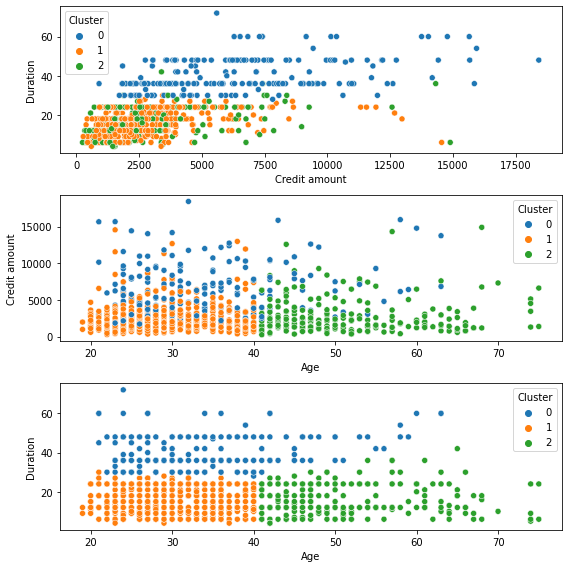

In [25]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

scatters(df_cluster, 'Cluster')

# Kesimpulan

In [26]:
hasil_cluster

,Age,Job,Credit amount,Duration,Age label,Checking account,Housing,Job,Purpose,Saving accounts,Sex,Cluster,size
0,33.8,2.1,6369.4,40.5,Dewasa,moderate,own,2,car,little,male,0,200
1,29.6,1.9,2408.6,16.0,Dewasa,unknown,own,2,car,little,male,1,566
2,51.4,1.8,2709.9,16.2,Lansia,unknown,own,2,car,little,male,2,234


<b>Informasi Mengenai Kolom</b><br>
- Age => Umur nasabah Bank
- Credit amount => Batas kredit yang digunakan oleh pemegang rekening
- Duration => Durasi pinjaman dalam bulan
- Age label => Label untuk rentang umur customer
- Checking account => Kategori Jumlah saldo di rekening
- Housing => Tipe rumah customer
- Job => Pekerjaan nasabah Bank
- Purpose => Tujuan penggunaan pengajuan kredit
- Saving accounts => Kategori untuk jumlah tabungan / Jenis tabungan yang menunjukan kecederungan peminjam untuk menabung
- Sex => Jenis kelamin nasabah Bank
- Cluster => Cluster data
- Size => Banyaknya data pada setiap cluster


### **Ringkasan Umum**

Nasabah yang meminjam kredit Bank paling **besar** berada pada rentang usia **21-63** tahun yang didominasi oleh Dewasa<br>
Nasabah  yang meminjam kredit Bank paling **sedikit** berada pada rentang usia **19-40** tahun yang didominasi oleh Dewasa
<br><br>
- Rata-Rata Nasabah Kredit Bank memiliki rumah **sendiri**
- Untuk gender dari semua cluster nasabah bank didominasi oleh **laki-laki**
- Tujuan kredit bank paling banyak untuk **mobil**
- Paling banyak nasabah memiliki jenis pekerjaan - **2** pada setiap Cluster


##### **Cluster 0**
- Batas **Credit amount** yang memiliki nilai rata-rata yang **tinggi** yaitu 6369
- Memiliki **Durasi** peminjaman yang **panjang** mencapai rata-rata 40 Bulan 15 Hari
- Customers yang mayoritas **Dewasa** dengan rata-rata berumur 34 Tahun<br>
Dari rentang **21 hingga 63 Tahun**
- Nasabah didominasi dengan **Saving account** yang little atau **sedikit**
- Nasabah rata-rata memiliki jenis **Checking account** yaitu **tidak diketahui** dan **little**<br>
Namun paling banyak **moderate** jenis Chechking account dari nasabah tersebut
- Tujuan nasabah didominasi oleh **mobil**, dilanjutkan dengan **radio/tv**<br><br>

##### **Cluster 1**
- Batas **Credit amount** yang memiliki nilai rata-rata yang paling **sedikit** yaitu 2408
- Memiliki **Durasi** peminjaman yang paling **sedikit** yaitu rata-rata 16 Bulan
- Customers yang mayoritas **Dewasa** dengan rata-rata berumur 30 Tahun<br>
Dari rentang **19 hingga 40 Tahun**
- Nasabah didominasi dengan **Saving account** yang little atau **sedikit**
- Nasabah rata-rata memiliki jenis **Checking account** yaitu **tidak diketahui**
- Tujuan nasabah didominasi oleh **mobil**, dilanjutkan dengan **radio/tv** dan **furniture/equipment**<br><br>

##### **Cluster 2**
- Batas **Credit amount** yang memiliki nilai rata-rata yang paling **sedikit** yaitu 2709
- Memiliki **Durasi** peminjaman yang **sedikit** yaitu rata-rata 16 Bulan 6 Hari
- Customers yang mayoritas **Lansia** dengan rata-rata berumur 51 Tahun<br>
Dari rentang 41 hingga 75 Tahun
- Nasabah didominasi dengan **Saving account** yang little atau **sedikit**
- Nasabah rata-rata memiliki jenis **Checking account** yaitu **tidak diketahui**
- Tujuan nasabah didominasi oleh **mobil**, dilanjutkan dengan **radio/tv**
- Nasabah didominasi oleh jenis pekerjaan - **2** dan jenis pekerjaan - **1** yang lumayan banyak

**Ringkasan Lainnya**

##### **Cluster 0**
- High mean of Credit Amount
- Long Duration
- Middle-Aged Customers

##### **Cluster 1**
- Lower mean of Credit Amount
- Short Duration
- Young Customers


##### **Cluster 1**
- Lower mean of Credit Amount
- Short duration
- Older Customers